# Componentes principales

In [1]:
import sys
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append('../py')
from exp import *

# Include path to binaries on PATH variable
bin_path = os.path.join(os.path.dirname('../'))
os.environ['PATH'] = "{}:{}".format(bin_path, os.environ['PATH'])

In [2]:
X, y = load_data('../data/train.csv')

## Varianza acumulada

In [3]:
eigenvalues = np.loadtxt('../eigen', delimiter=' ', dtype=np.float32)

In [4]:
acum_variance = np.cumsum(eigenvalues)

In [5]:
def quant(q):
    return np.argmax(acum_variance > acum_variance[-1] * q)

In [6]:
z = acum_variance[36] / acum_variance[-1]

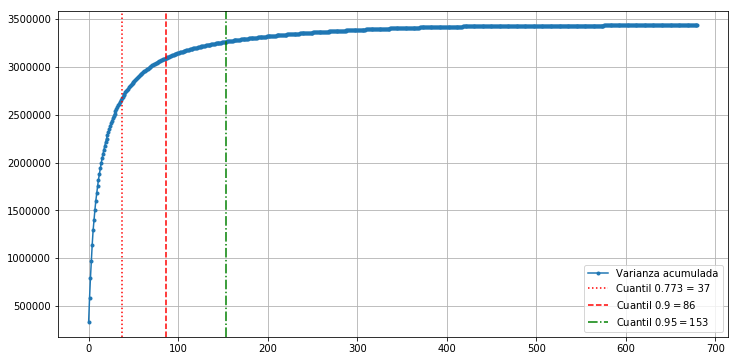

In [7]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(eigenvalues.shape[0]), acum_variance, '.-', label='Varianza acumulada')
plt.axvline(x=37, color='r', linestyle=':', label='Cuantil {:.3f} = 37'.format(z))
plt.axvline(x=quant(0.9), color='r', linestyle='--', label='Cuantil $0.9 = {}$'.format(quant(0.9)))
plt.axvline(x=quant(0.95), color='g', linestyle='-.', label='Cuantil $0.95 = {}$'.format(quant(0.95)))
plt.legend()
plt.grid()

In [8]:
from sklearn.decomposition import PCA

n_components = 32
pca = PCA(n_components=n_components).fit(X)
eigenvalues = pca.components_

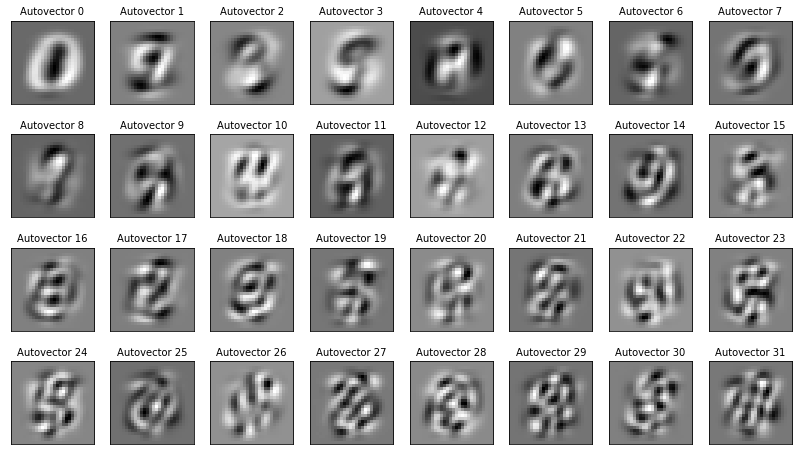

In [9]:
n_row = 4
n_col = 8

# Plot the first 8 eignenvalues
plt.figure(figsize=(14,8))
for i in list(range(n_row * n_col)):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28, 28), cmap='gray')
    plt.title('Autovector {}'.format(i), size=10)
    plt.xticks(())
    plt.yticks(())